In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Definimos a cidade do buscador

In [2]:
# Sao Paulo
SP_url = '''https://www.airbnb.com.br/s/Sao-Paulo-~-S%C3%A3o-Paulo--Brazil/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&query=Sao%20Paulo%20-%20S%C3%A3o%20Paulo%2C%20Brazil&place_id=ChIJ0WGkg4FEzpQRrlsz_whLqZs&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click'''

# Rio
RJ_url = '''https://www.airbnb.com.br/s/Rio-de-Janeiro-~-RJ/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=Rio%20de%20Janeiro%20-%20RJ&place_id=ChIJW6AIkVXemwARTtIvZ2xC3FA'''

# Lista com cada um dos links das paginas do buscador

In [3]:
def create_pages(city_url):
    '''
    this function returns a list with the urls of each page according to the 
    city in (city_url)
    
    input:
    city_url - string with the url of any city defined in the airbnb searcher
    '''
    # empty list to append each page url
    pages = []
    pages.append(city_url)             

    # with this loop we 
    for i in range(1000):
        soup = BeautifulSoup(requests.get(pages[-1]).content, 'html.parser')
        try:
            url = 'https://www.airbnb.com.br' + soup.find('a', '_1bfat5l').get('href')
        except:
            break
        pages.append(url)
        
    return pages

In [4]:
pages_sp = create_pages(SP_url)
pages_rj = create_pages(RJ_url)

# Construção de listas com os dados de interesse e do dataframe com os dados da varredura

In [5]:
# scraping dos títulos, camas, precos e avaliacoes de cada uma das acomodações
def create_df(pages):
    '''
    this function returns a dataframe with all the information we extract from the airbnb 
    website
    
    input:
    pages - a list with the urls of each page of the airbnb searcher
    '''
    # we create empty lists to collect the information we want to build the datasets
    titles = []
    links = []
    camas = []
    precos = []
    avaliacoes = []
    
    # iteration through each one of the html code of each page
    for page in pages:
        soup = BeautifulSoup(requests.get(page).content, 'html.parser')
        
        # here we navigate through the tags and classes to collect the information we want
        for i in range(len(soup.find_all('a', 'ln2bl2p dir dir-ltr'))):
            links.append('https://www.airbnb.com.br' + soup.find_all('a', 'ln2bl2p dir dir-ltr')[i].get('href'))
            titles.append(soup.find_all('div', 't1jojoys dir dir-ltr')[i].get_text())
            camas.append(soup.find_all('div', 'f15liw5s s1cjsi4j dir dir-ltr')[i].get_text())
            precos.append(soup.find_all('div', 'p1v28t5c dir dir-ltr')[i].get_text())
            avaliacoes.append(soup.find_all('span', 'ru0q88m dir dir-ltr')[i].get_text())
    
    # construcao do dataframe com os dados da varredura
    df = pd.DataFrame({'titles': titles, 'link': links, 'camas': camas, 'precos': precos, 'avaliacoes': avaliacoes})
    # data cleaning of the prices data using regex to extract just numerical values
    df['precos'] = df['precos'].str.extract('(\d+)')
    # tranforming prices data to numerical values
    df['precos'] = df.precos.astype('float')
    
    return df

# Construção do dataframe com os dados da varredura

In [6]:
df_sp = create_df(pages_sp)
df_rj = create_df(pages_rj)

In [7]:
df_sp['cidade'] = "São Paulo"
df_rj['cidade'] = "Rio de Janeiro"
# concatenation of the dataframes of each city we collected the data
df = pd.concat([df_sp, df_rj])

In [8]:
df.head(20)

,titles,link,camas,precos,avaliacoes,cidade
0,Apartamento em São Paulo,https://www.airbnb.com.br/rooms/12167996?adult...,1 cama de casal,135.0,"4,71",São Paulo
1,Apartamento em Pinheiros,https://www.airbnb.com.br/rooms/52471075?adult...,5 – 12 de ago.,176.0,"5,0",São Paulo
2,Apartamento em São Paulo,https://www.airbnb.com.br/rooms/2286825?adults...,1 cama queen,168.0,"4,78",São Paulo
3,Apartamento em Jardim Paulista,https://www.airbnb.com.br/rooms/36278176?adult...,21 – 28 de ago.,201.0,"4,96",São Paulo
4,Apartamento em Pinheiros,https://www.airbnb.com.br/rooms/61973782444728...,1 cama de casal,167.0,"5,0",São Paulo
5,Quarto inteiro em São Paulo,https://www.airbnb.com.br/rooms/16715287?adult...,24 – 31 de jul.,62.0,"4,8",São Paulo
6,Apartamento em Bela Vista,https://www.airbnb.com.br/rooms/53956149?adult...,1 cama queen,163.0,"5,0",São Paulo
7,Condomínio em Consolação,https://www.airbnb.com.br/rooms/29124758?adult...,19 – 26 de dez.,121.0,"4,84",São Paulo
8,Loft em Santa Cecilia,https://www.airbnb.com.br/rooms/60386994196014...,1 cama queen,80.0,"4,5",São Paulo
9,Loft em Pinheiros,https://www.airbnb.com.br/rooms/59641149765946...,23 – 30 de ago.,211.0,"4,89",São Paulo


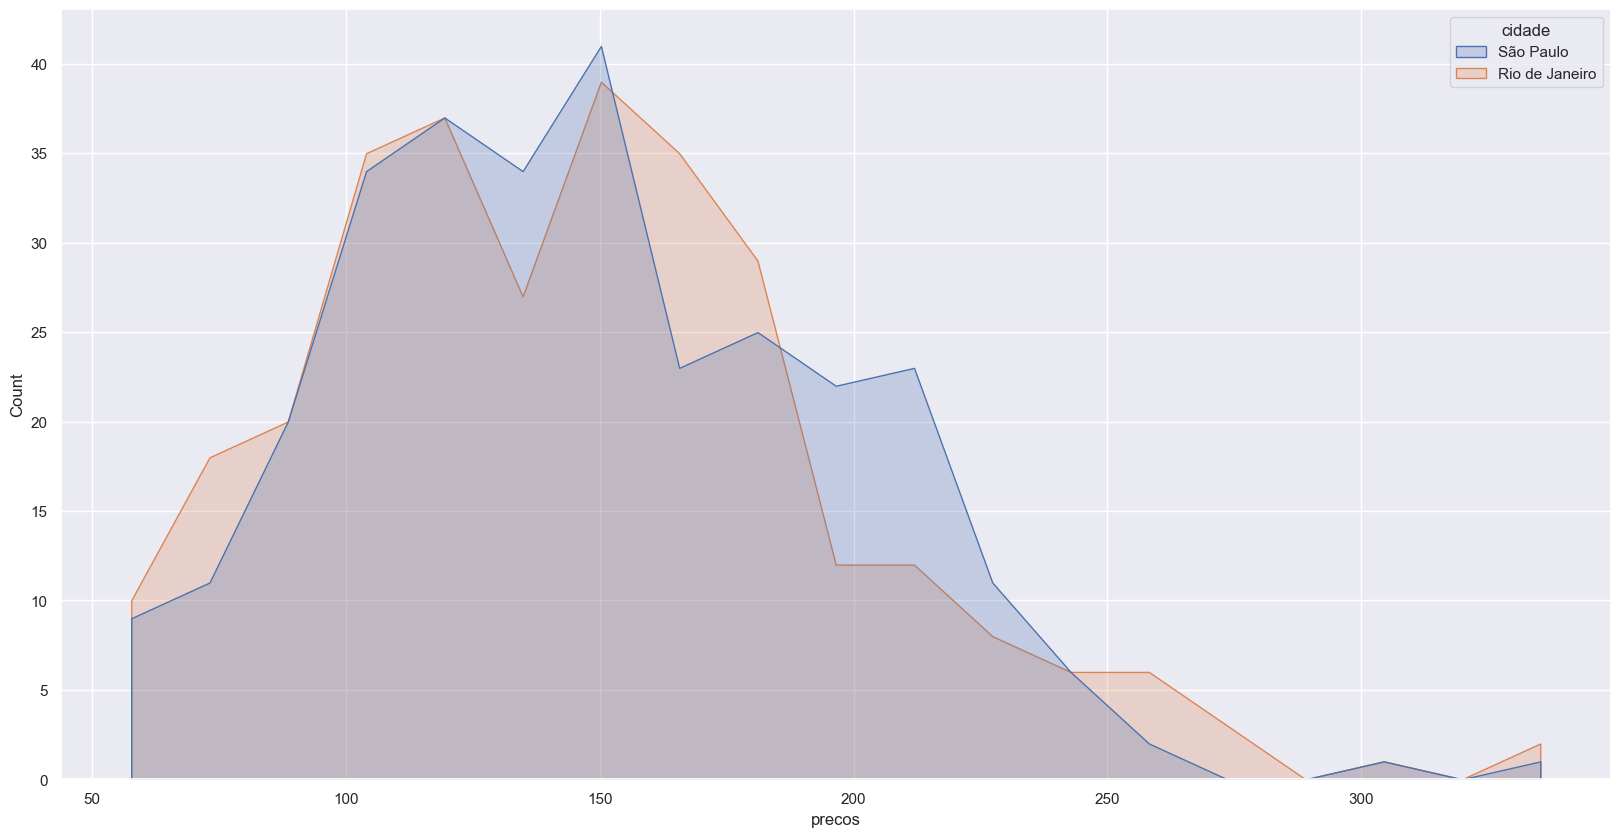

In [14]:
# ploting data to make comparisons
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.histplot(data=df, x="precos", hue="cidade", element="poly", discrete=False);
plt.show()

Os dataframes foram construidos com dados de São Paulo e Rio De Janeiro, pode ser feita uma análise comparativa dos preços e outros atributos de cada uma das acomodações.